<a href="https://www.kaggle.com/code/faressayah/20-news-groups-classification-prediction-cnns?scriptVersionId=118512136" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🎯 Learning Objectives

> - Document Classification
> - Text Pre-processing
> - Feature extraction
> - Vocabulary creation

# 📋 Vocabulary & Feature Extraction
> Given a document, you can represent it as a vector of dimension V, where V corresponds to your vocabulary size. As V gets larger, the vector becomes more sparse. Furthermore, we end up having many more features and end up training lot of parameters. This could result in larger training time, and large prediction time.

# 🔨 Preprocessing
When preprocessing, you have to perform the following:
> 1. Eliminate handles and URLs
> 2. Tokenize the string into words
> 3. Remove stop words like "and, is, a, on, etc."
> 4. Stemming - or convert every word to its stem. Like dancer, dancing, danced, becomes 'danc'.
> 5. Convert all your words to lower case.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import Normalizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import tensorflow as tf

from tensorflow.keras import layers
import tensorflow_datasets as tfds


categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space'
]

In [2]:
data_train = fetch_20newsgroups(
    subset='train', 
    categories=categories, 
    shuffle=True, 
    random_state=42
)
n_components = 5
labels = data_train.target
true_k = np.unique(labels).shape[0]

# Convert to TF-IDF format
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english', use_idf=True)
X_train = vectorizer.fit_transform(data_train.data)

# Reduce dimensions
svd = TruncatedSVD(n_components)
normalizer = Normalizer(copy=False)
# lsa = make_pipeline(svd, normalizer)

# X_train = lsa.fit_transform(X_train)

print("Train data length: ", len(data_train.data))

# Order of labels in `target_names` can be different from `categories`
data_test = fetch_20newsgroups(
    subset='test', 
    categories=categories, 
    shuffle=True, 
    random_state=42
)

target_names = data_train.target_names

# Split a train set and test set
y_train, y_test = data_train.target, data_test.target

print("Extracting features from the test data using the same vectorizer")
X_test = vectorizer.transform(data_test.data)
# X_test = lsa.fit_transform(X_test)

Train data length:  2034
Extracting features from the test data using the same vectorizer


# 🤖 Machine Learning

# ✔️ Logistic Regression

In [3]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train.toarray(), y_train)

lr_pred = lr_clf.predict(X_train.toarray())
train_score = accuracy_score(y_train, lr_pred) * 100
print(f"Train accuracy score: {train_score:.2f}%")

lr_pred = lr_clf.predict(X_test.toarray())
test_score = accuracy_score(y_test, lr_pred) * 100
print(f"Test accuracy score: {test_score:.2f}%")

Train accuracy score: 99.41%
Test accuracy score: 88.10%


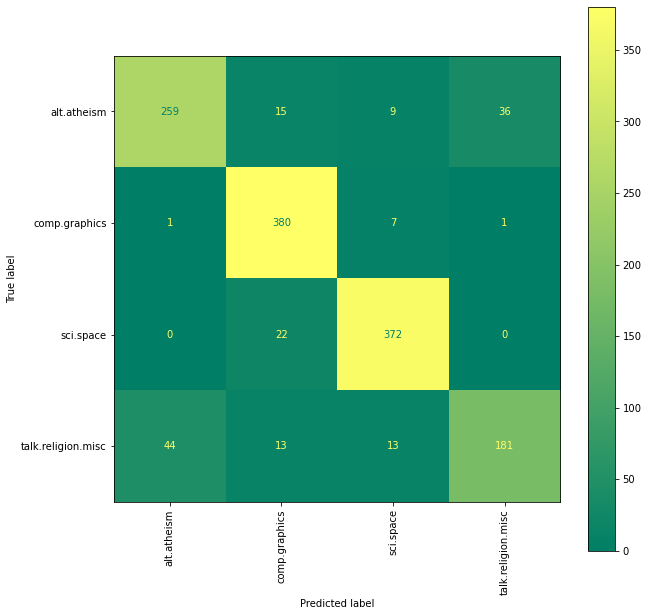

In [4]:
# lr_pred = lr_clf.predict(X_test.toarray())
cm = confusion_matrix(y_test, lr_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=data_train.target_names
)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')

plt.show()

In [5]:
pd.DataFrame(classification_report(y_test, lr_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.851974,0.811912,0.831461,319.000000
1,0.883721,0.976864,0.927961,389.000000
2,0.927681,0.944162,0.935849,394.000000
3,0.830275,0.721116,0.771855,251.000000
accuracy,0.881005,0.881005,0.881005,0.881005
macro avg,0.873413,0.863513,0.866781,1353.000000
weighted avg,0.879122,0.881005,0.878546,1353.000000


# ✔️ Naive Bayes

In [6]:
nb_clf = GaussianNB()
nb_clf.fit(X_train.toarray(), y_train)

nb_pred = nb_clf.predict(X_train.toarray())
train_score = accuracy_score(y_train, nb_pred) * 100
print(f"Train accuracy score: {train_score:.2f}%")

nb_pred = nb_clf.predict(X_test.toarray())
test_score = accuracy_score(y_test, nb_pred) * 100
print(f"Test accuracy score: {test_score:.2f}%")

Train accuracy score: 100.00%
Test accuracy score: 84.18%


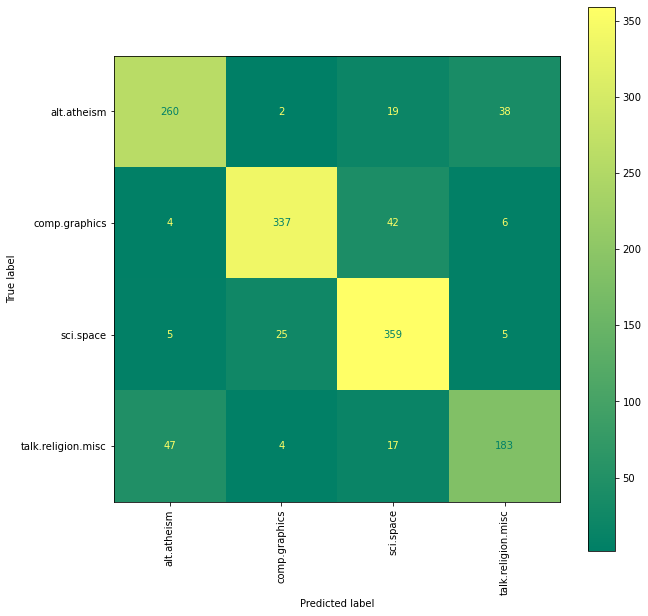

In [7]:
# nb_pred = nb_clf.predict(X_test.toarray())
cm = confusion_matrix(y_test, nb_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=data_train.target_names
)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')

plt.show()

In [8]:
pd.DataFrame(classification_report(y_test, nb_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.822785,0.815047,0.818898,319.000000
1,0.915761,0.866324,0.890357,389.000000
2,0.821510,0.911168,0.864019,394.000000
3,0.788793,0.729084,0.757764,251.000000
accuracy,0.841833,0.841833,0.841833,0.841833
macro avg,0.837212,0.830406,0.832759,1353.000000
weighted avg,0.842839,0.841833,0.841241,1353.000000


# ✔️ Support Vector Machine

In [9]:
svm_clf = SVC()
svm_clf.fit(X_train.toarray(), y_train)

svm_pred = svm_clf.predict(X_train.toarray())
train_score = accuracy_score(y_train, svm_pred) * 100
print(f"Train accuracy score: {train_score:.2f}%")

svm_pred = svm_clf.predict(X_test.toarray())
test_score = accuracy_score(y_test, svm_pred) * 100
print(f"Test accuracy score: {test_score:.2f}%")

Train accuracy score: 99.95%
Test accuracy score: 88.62%


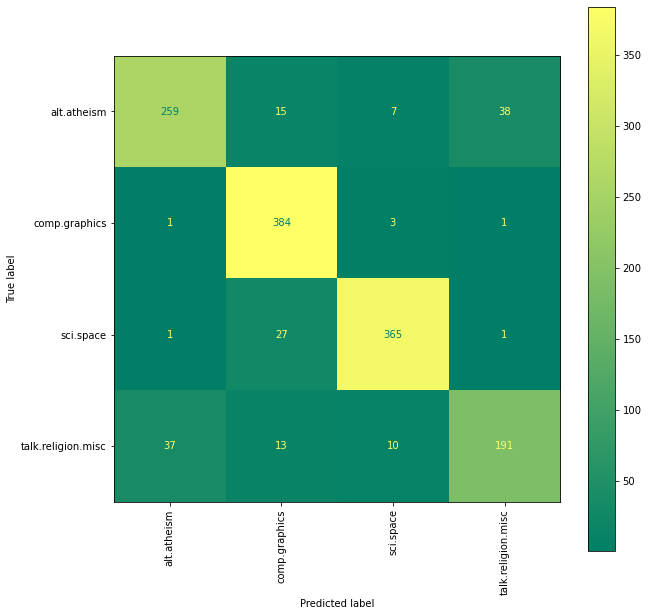

In [10]:
cm = confusion_matrix(y_test, svm_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=data_train.target_names
)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')

plt.show()

In [11]:
pd.DataFrame(classification_report(y_test, svm_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.869128,0.811912,0.839546,319.000000
1,0.874715,0.987147,0.927536,389.000000
2,0.948052,0.926396,0.937099,394.000000
3,0.826840,0.760956,0.792531,251.000000
accuracy,0.886179,0.886179,0.886179,0.886179
macro avg,0.879684,0.871603,0.874178,1353.000000
weighted avg,0.885872,0.886179,0.884530,1353.000000


# ✔️ Convolutional Neural Networks - CNNs

In [12]:
data_train = fetch_20newsgroups(
    subset='train', 
    categories=categories, 
    shuffle=True, 
    random_state=42
)

data_test = fetch_20newsgroups(
    subset='test', 
    categories=categories, 
    shuffle=True, 
    random_state=42
)

X_train = data_train.data
y_train = data_train.target

X_test = data_test.data
y_test = data_test.target

assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))

## Tokenization

In [13]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    X_train, target_vocab_size=2**18
)

train_inputs = [tokenizer.encode(text) for text in X_train]
test_inputs = [tokenizer.encode(text) for text in X_test]

## Padding

In [14]:
MAX_LEN = max([len(sentence) for sentence in train_inputs])
train_inputs = tf.keras.preprocessing.sequence.pad_sequences(
    train_inputs,
    value=0,
    padding="post",
    maxlen=MAX_LEN
)

test_inputs = tf.keras.preprocessing.sequence.pad_sequences(
    test_inputs,
    value=0,
    padding="post",
    maxlen=MAX_LEN
)

In [15]:
class DCNN(tf.keras.Model):
    
    def __init__(self, vocab_size, emb_dim=128, nb_filters=50, FFN_units=512, nb_classes=2,
                 dropout_rate=0.1, training=False, name="dcnn"):
        super(DCNN, self).__init__(name=name)
        
        self.embedding = layers.Embedding(vocab_size, emb_dim)
        self.bigram = layers.Conv1D(filters=nb_filters, kernel_size=2, padding="valid", activation="relu")
        self.trigram = layers.Conv1D(filters=nb_filters, kernel_size=3, padding="valid", activation="relu")
        self.fourgram = layers.Conv1D(filters=nb_filters, kernel_size=4, padding="valid", activation="relu")
        self.pool = layers.GlobalMaxPool1D() # no training variable so we can
                                             # use the same layer for each
                                             # pooling step
        self.dense_1 = layers.Dense(units=FFN_units, activation="relu")
        self.dropout = layers.Dropout(rate=dropout_rate)
        if nb_classes == 2:
            self.last_dense = layers.Dense(units=1, activation="sigmoid")
        else:
            self.last_dense = layers.Dense(units=nb_classes, activation="softmax")
    
    def call(self, inputs, training):
        x = self.embedding(inputs)
        x_1 = self.bigram(x)
        x_1 = self.pool(x_1)
        x_2 = self.trigram(x)
        x_2 = self.pool(x_2)
        x_3 = self.fourgram(x)
        x_3 = self.pool(x_3)
        
        merged = tf.concat([x_1, x_2, x_3], axis=-1) # (batch_size, 3 * nb_filters)
        merged = self.dense_1(merged)
        merged = self.dropout(merged, training)
        output = self.last_dense(merged)
        
        return output

In [16]:
VOCAB_SIZE = tokenizer.vocab_size

EMB_DIM = 200
NB_FILTERS = 100
FFN_UNITS = 256
NB_CLASSES = len(set(y_train))

DROPOUT_RATE = 0.2

BATCH_SIZE = 32
NB_EPOCHS = 10

Dcnn = DCNN(
    vocab_size=VOCAB_SIZE, 
    emb_dim=EMB_DIM, 
    nb_filters=NB_FILTERS,
    FFN_units=FFN_UNITS, 
    nb_classes=NB_CLASSES,
    dropout_rate=DROPOUT_RATE
)

2023-02-07 21:34:20.451322: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-07 21:34:20.557945: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-07 21:34:20.558962: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-07 21:34:20.561168: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [17]:
if NB_CLASSES == 2:
    Dcnn.compile(
        loss="binary_crossentropy",
        optimizer="adam",
        metrics=["accuracy"]
    )
else:
    Dcnn.compile(
        loss="sparse_categorical_crossentropy",
        optimizer="adam",
        metrics=["sparse_categorical_accuracy"]
    )

In [18]:
checkpoint_path = "./drive/My Drive/projects/CNN_for_NLP/ckpt/"

ckpt = tf.train.Checkpoint(Dcnn=Dcnn)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print("Latest checkpoint restored!!")

In [19]:
Dcnn.fit(
    train_inputs,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=NB_EPOCHS
)
ckpt_manager.save()

2023-02-07 21:34:23.621091: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2023-02-07 21:34:25.562077: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


64/64 [==============================] - 21s 200ms/step - loss: 1.1596 - sparse_categorical_accuracy: 0.5202
Epoch 2/10
64/64 [==============================] - 13s 197ms/step - loss: 0.2571 - sparse_categorical_accuracy: 0.9420
Epoch 3/10
64/64 [==============================] - 12s 195ms/step - loss: 0.0296 - sparse_categorical_accuracy: 0.9956
Epoch 4/10
64/64 [==============================] - 13s 197ms/step - loss: 0.0074 - sparse_categorical_accuracy: 0.9990
Epoch 5/10
64/64 [==============================] - 13s 196ms/step - loss: 0.0028 - sparse_categorical_accuracy: 1.0000
Epoch 6/10
64/64 [==============================] - 13s 196ms/step - loss: 0.0013 - sparse_categorical_accuracy: 1.0000
Epoch 7/10
64/64 [==============================] - 13s 196ms/step - loss: 9.1057e-04 - sparse_categorical_accuracy: 1.0000
Epoch 8/10
64/64 [==============================] - 13s 197ms/step - loss: 7.0834e-04 - sparse_categorical_accuracy: 1.0000
Epoch 9/10
64/64 [=========================

'./drive/My Drive/projects/CNN_for_NLP/ckpt/ckpt-1'

In [20]:
results = Dcnn.evaluate(test_inputs, y_test, batch_size=BATCH_SIZE)
print(results)

43/43 [==============================] - 3s 67ms/step - loss: 0.4148 - sparse_categorical_accuracy: 0.8825
[0.4148004353046417, 0.8824833631515503]
